In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn
from collections import Counter
###import packages
from scEasyMode import pymulti
###set max recursion
import sys
sys.setrecursionlimit(100000)
import os

In [ ]:
### need to subsample R1 and R2; too big
R1_raw = 'Hash_S2_R1_001.fastq.gz'
R2_raw = 'Hash_S2_R2_001.fastq.gz'
os.system('gunzip '+R1_raw)
os.system('gunzip '+R2_raw)


In [ ]:
%%bash
#### see ref: http://userweb.eng.gla.ac.uk/umer.ijaz/bioinformatics/subsampling_reads.pdf
paste Hash_S2_R1_001.fastq Hash_S2_R2_001.fastq | awk '{ printf("%s",$0); n++;
if(n%4==0) { printf("\n");} else { printf("\t");} }' |
awk -v k=1000000 'BEGIN{srand(systime() + PROCINFO["pid"]);}{s=x++<k?x1:int(rand()*x);if(s<k)R[s]=$0}END{for(i in R)print R[i]}' |
awk -F"\t" '{print $1"\n"$3"\n"$5"\n"$7 > "forward_sub.fastq";print $2"\n"$4"\n"$6"\n"$8 > "reverse_sub.fastq"}'

In [ ]:
%%bash
### zip up
gzip *.fastq

In [2]:
lib10x = 'BZHG01'
libmulti = 'BZHG01'
####define files
R1 = 'forward_sub.fastq.gz'
R2 = 'reverse_sub.fastq.gz'
bc10xfile = 'wl.tsv'
bcfile = 'HashDic.csv'
####define metadata
v10x = 'v3.1'
expname = 'BZHG01'
sampname = 'BZHG01'
####define length of sequences
len_10x = 14
len_umi = 12
len_multi = 15
####define multiseq barcodes file
bcsmulti = pd.read_csv(bcfile,sep=',',index_col=1,header=None)
bcsmulti.columns = ['multi']
bcsmulti = bcsmulti['multi'].tolist()
####define 10x barcodes whitelist
bcs10x = pd.read_csv(bc10xfile,sep='\t',header=None)
bcs10x = bcs10x[0].tolist()
bcs10x = [cell[:-2] for cell in bcs10x]

In [ ]:
table = pymulti.read_pickle(lib10x,reads=None,huge=False)

In [ ]:
table[table.multi=='TGTCTTTCCTGCCAG']

In [ ]:
pymulti.pymulti(R1,R2,bcsmulti,bcs10x,len_10x=len_10x,len_multi=len_multi,len_umi=len_umi,split=False,hamming=False,med_factor=1.5,median_only=True,sampname=lib10x)

In [ ]:
pymulti.pymulti(R1,R2,bcsmulti,bcs10x,len_10x=len_10x,len_multi=len_multi,len_umi=len_umi,split=False,hamming=False,med_factor=1.5,median_only=False,sampname=lib10x)

In [13]:
thresh_dict=pd.read_csv('threshdict.csv',header=None,index_col=0)
thresh_dict = thresh_dict[1].to_dict()

In [14]:
thresh_dict

{'TGTCTTTCCTGCCAG': 0.5,
 'CTCCTCTGCAATTAC': 0.75,
 'CAGTAGTCACGGTCA': 0.75,
 'ATTGACCCGCGTTAG': 1.0,
 'TAACGACCAGCCATA': 0.75,
 'AAATCTCTCAGGCTC': 0.5,
 'CTGTATGTCCGATTG': 0.75,
 'TAAGATTCAGAGCGA': 2.0}

Multiseq rate is:  91.57061929398958
10X Cell Barcode rate is:  20.464589410618142
Duplication rate is:  1.388082271640665


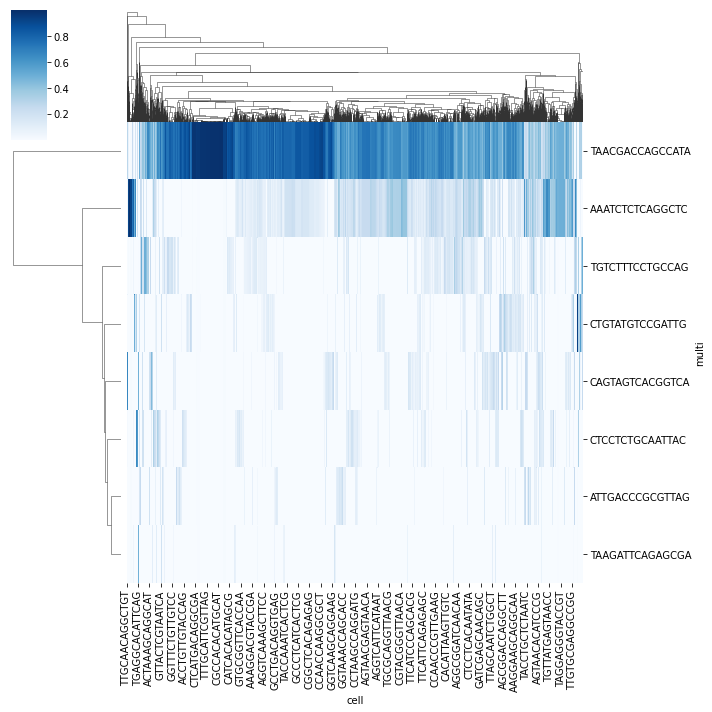

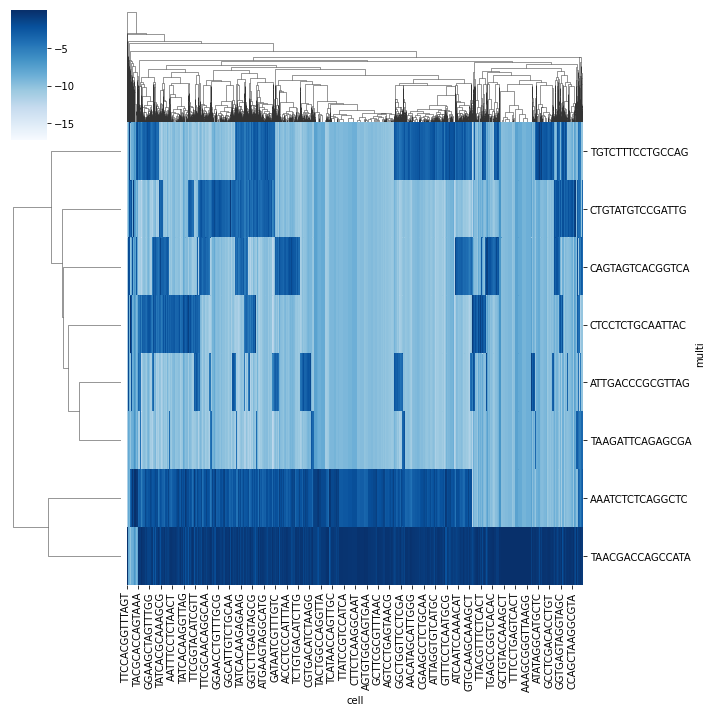

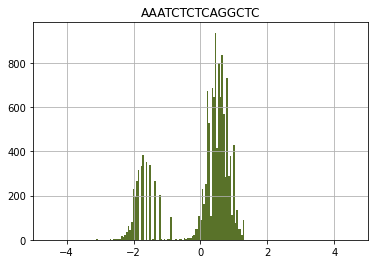

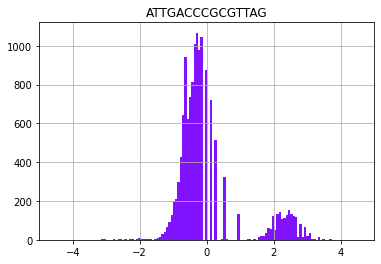

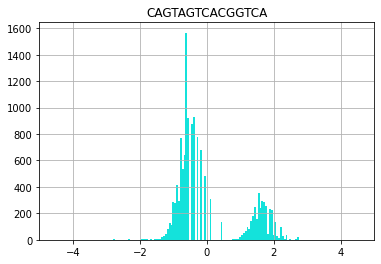

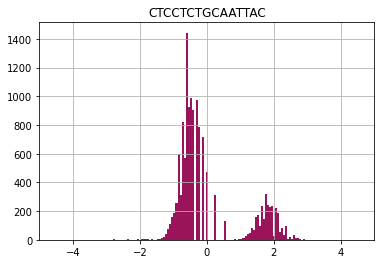

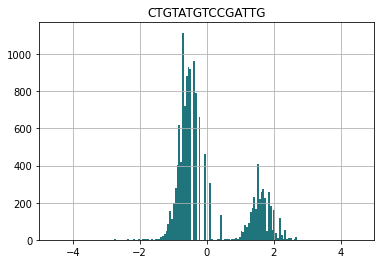

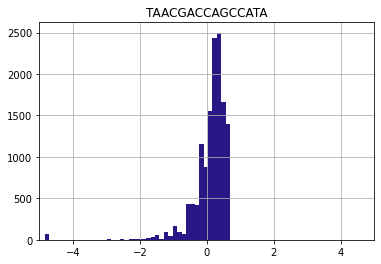

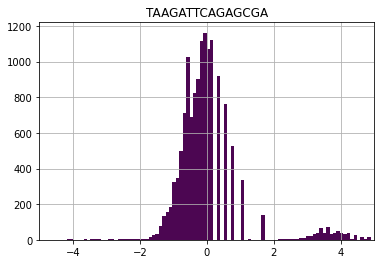

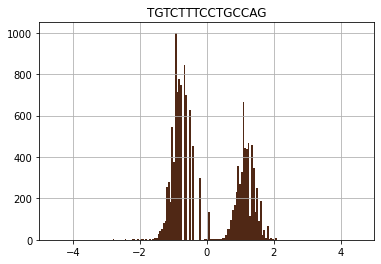

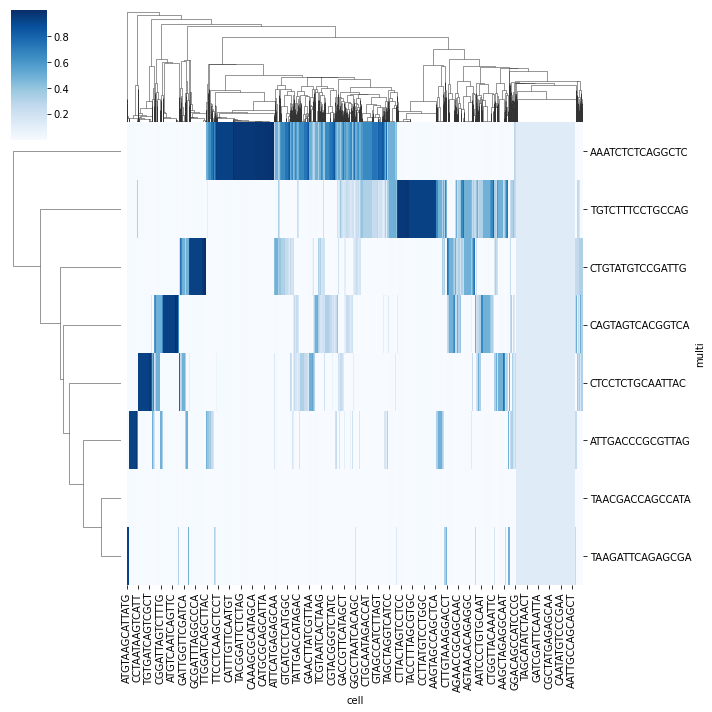

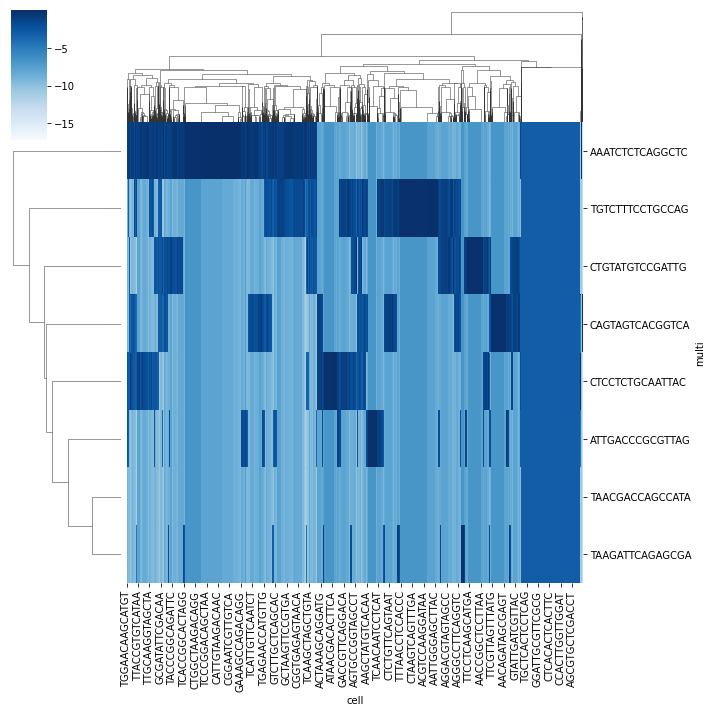

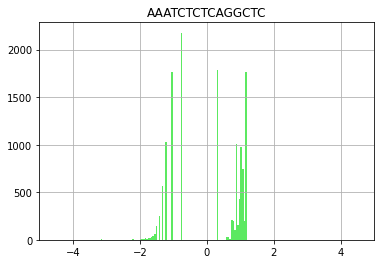

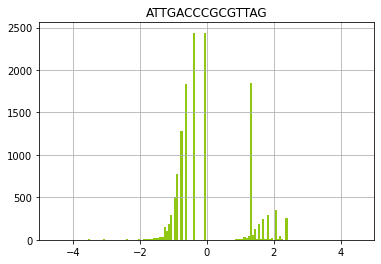

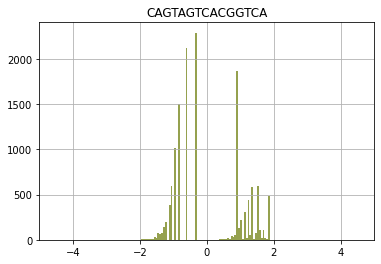

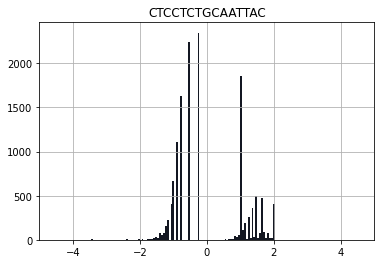

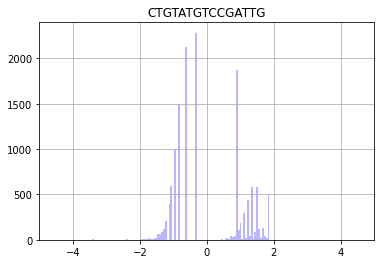

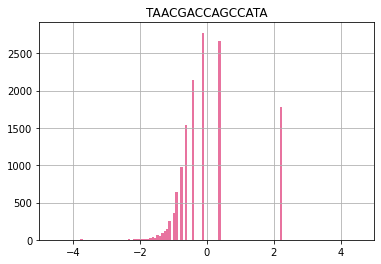

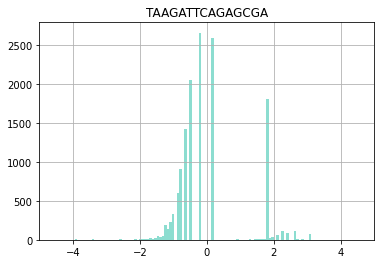

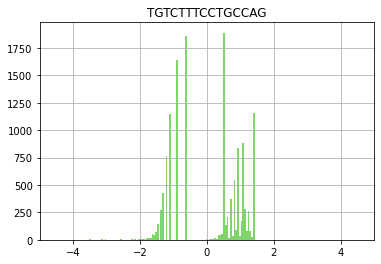

In [15]:
pymulti.pymulti(R1,R2,bcsmulti,bcs10x,len_10x=len_10x,len_multi=len_multi,len_umi=len_umi,split=False,thresh=True,hamming=False,med_factor=1.5,median_only=False,sampname=lib10x,thresh_dict=thresh_dict)